In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd

In [3]:
# Read the dataset

# Save it into a dataframe called "leads"
leads = pd.read_csv('Leads.csv')

In [4]:
# Looking at the first few entries
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspecting the shape of the dataset
leads.shape

(9240, 37)

In [6]:
# Inspecting the different columsn in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [9]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

We can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3400 missing values as they are of no use to us.

In [10]:
# Dropping all the columns in which greater than 3000 missing values are present
for col in leads.columns:
    if leads[col].isnull().sum() > 3400:
        leads = leads.drop(col,axis=1)

In [11]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending = False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The

As we might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [12]:
# drop City

leads = leads.drop('City', axis = 1)

In [13]:
# Same goes for the variable 'Country'

# drop Country
leads = leads.drop('Country', axis = 1)

In [14]:
# Let's check the percentage of missing values in each column
(100 * leads.isnull().sum()/leads.shape[0]).sort_values(ascending= False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [15]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Through Recommendations                             0
Receive More Updates About Our Courses              0
Prospect ID                                         0
Newspaper                                           0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Digital Advertisement       

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [16]:
# Get the value counts of all the columns
for col in leads.columns:
    print(leads[col].astype('object').value_counts())
    print("___________________________________________________")

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

In [17]:
# applying v_c() on Lead Profile col
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
# applying v_c() on How did you hear about X Education col
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
# applying v_c() on Specialization
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [20]:
# drop Lead Profile and How did you hear about X Education cols
leads = leads.drop(['Lead Profile','How did you hear about X Education'], axis = 1)

Also we notice that when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [21]:
leads = leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 
                    'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 
                    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [22]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# Drop the col 'What matters most to you in choosing a course'

leads = leads.drop('What matters most to you in choosing a course', axis = 1)

In [24]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                      3353
What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [25]:
leads.isnull().sum().sort_values(ascending=False)

Tags                                      3353
What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. We can drop the entire column but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [26]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [27]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                      744
TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [28]:
# Dropping the null value rows in the column 'TotalVisits'
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [29]:
# Check the null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                      731
Lead Source                                29
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [30]:
# Dropping the null values rows in the column 'Lead Source'
leads = leads[~pd.isnull(leads['Lead Source'])]

In [31]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                      725
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [32]:
# Dropping the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [33]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                      707
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [34]:
# Dropping the null values rows in the column 'Tags'

leads = leads[~pd.isnull(leads['Tags'])]

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [35]:
print(len(leads.index))
print(len(leads.index)/9240)

5666
0.6132034632034632


In [36]:
print(len(leads.index))
print(len(leads.index)/9240)

5666
0.6132034632034632


We still have around 61% of the rows which seems good enough.

In [37]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,No,Modified


In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             5666 non-null   object 
 1   Lead Number                             5666 non-null   int64  
 2   Lead Origin                             5666 non-null   object 
 3   Lead Source                             5666 non-null   object 
 4   Do Not Email                            5666 non-null   object 
 5   Converted                               5666 non-null   int64  
 6   TotalVisits                             5666 non-null   float64
 7   Total Time Spent on Website             5666 non-null   int64  
 8   Page Views Per Visit                    5666 non-null   float64
 9   Last Activity                           5666 non-null   object 
 10  Specialization                          5666 non-null   obje

Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [39]:
# Drop columns Prospect ID and Lead Number
leads = leads.drop(['Prospect ID','Lead Number'], axis = 1)

In [40]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Will revert after reading the email,No,Modified


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [41]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == "object"]
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [43]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [46]:
# Creating dummy variable separately for the variable 'Tags' since it has the level 'will revert after reading the email' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_tag = pd.get_dummies(leads['Tags'], prefix = 'Tags')
dummy_tag = dummy_tag.drop(['Tags_Will revert after reading the email'], 1)
leads = pd.concat([leads, dummy_tag], axis = 1)

In [47]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity','Tags'], 1)

In [48]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [49]:
# Import the required library

from sklearn.model_selection import train_test_split

In [50]:
# Put all the feature variables in X

X = leads.drop('Converted', axis = 1)

In [51]:
# Put the target variable in y
y = leads.Converted

In [52]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9235    1
9236    0
9237    0
9239    1
Name: Converted, Length: 5666, dtype: int64

In [53]:
# Splitting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [54]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [55]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Scale the three numeric features present in the dataset



scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
4145,0.067568,0.482394,0.166667,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8533,0.027027,0.065141,0.133333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3876,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,0.040541,0.272887,0.100000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7107,0.027027,0.012764,0.133333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [57]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
Converted,1.000000,0.025141,0.339829,-0.034967,-0.077101,0.289411,-0.014648,-0.114030,-0.016894,0.025200,...,0.001779,-0.018721,-0.017096,-0.007819,-0.018776,-0.107980,-0.060567,-0.055658,-0.184302,-0.083208
TotalVisits,0.025141,1.000000,0.190621,0.469510,0.260163,-0.209166,-0.041440,0.061676,-0.040332,0.080467,...,-0.006585,-0.004793,-0.006585,0.010644,-0.009123,0.004139,-0.002225,0.000986,0.007322,0.014610
Total Time Spent on Website,0.339829,0.190621,1.000000,0.298349,0.270559,-0.237685,-0.058459,0.106475,-0.057904,0.196653,...,0.000096,0.003084,0.000312,0.006840,-0.008072,-0.044011,0.000975,-0.018269,-0.055830,-0.026206
Page Views Per Visit,-0.034967,0.469510,0.298349,1.000000,0.454317,-0.354026,-0.065082,0.080194,-0.061640,0.176280,...,-0.005302,-0.003925,-0.005302,-0.001821,-0.015791,0.024933,0.007680,0.010258,0.041888,0.029710
Lead Origin_Landing Page Submission,-0.077101,0.260163,0.270559,0.454317,1.000000,-0.378994,-0.076329,0.496776,-0.072313,0.054282,...,-0.004250,0.003763,-0.004250,-0.007364,-0.026165,0.040197,0.036815,0.027869,0.056649,0.029190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tags_invalid number,-0.107980,0.004139,-0.044011,0.024933,0.040197,-0.036925,-0.007437,0.040276,-0.007612,-0.040234,...,-0.002291,-0.003970,-0.002291,-0.003970,-0.005617,1.000000,-0.008117,-0.009332,-0.025643,-0.011151
Tags_number not provided,-0.060567,-0.002225,0.000975,0.007680,0.036815,-0.020161,-0.004060,0.046345,-0.004156,-0.028897,...,-0.001251,-0.002168,-0.001251,-0.002168,-0.003067,-0.008117,1.000000,-0.005095,-0.014001,-0.006089
Tags_opp hangup,-0.055658,0.000986,-0.018269,0.010258,0.027869,-0.023180,-0.004668,0.032734,-0.004779,-0.018145,...,-0.001438,-0.002492,-0.001438,-0.002492,-0.003526,-0.009332,-0.005095,1.000000,-0.016097,-0.007000
Tags_switched off,-0.184302,0.007322,-0.055830,0.041888,0.056649,-0.063692,0.001593,0.034098,0.000960,-0.000965,...,-0.003952,-0.006848,-0.003952,-0.006848,-0.009689,-0.025643,-0.014001,-0.016097,1.000000,-0.019235


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [58]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [60]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True])

In [61]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', False, 77),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 64),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 82),
 ('Lead Source_Press_Release', False, 81),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_WeLearn', False, 85),
 ('Lead Source_Welingak Website', False, 20),
 ('Lead Source_bing', False, 69),
 ('Lead Source_testone', False, 63),
 ('Do Not Email_Yes', False, 12),
 ('Last Activity_Converted to Lead', False, 80),
 ('Last Activity_Email Bounced', False, 46),
 ('Last Activity

In [62]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [63]:
col

Index(['Total Time Spent on Website', 'Tags_Already a student', 'Tags_Busy',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_in touch with EINS', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [64]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [65]:
# Import statsmodels

import statsmodels.api as sm

In [66]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3950
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -547.08
Date:                Tue, 30 Jul 2024   Deviance:                       1094.2
Time:                        01:24:00   Pearson chi2:                 3.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6687
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.6291      0.141     18.626      0.000       2.352       2.906
Total Time Spent on Website            3.2777      0.358      9.144      0.000       2.575       3.980
Tags_Already a student                -8.4628      0.727    -11.641      0.000      -9.888      -7.038
Tags_Busy                             -3.3408      0.237    -14.106      0.000      -3.805      -2.877
Tags_Diploma holder (Not Eligible)    -7.2257      1.034     -6.986      0.000      -9.253      -5.198
Tags_Graduation in progress           -6.1054      0.503    -12.132      0.000      -7.092      -5.119
Tags_Interested  in full time MBA     -6.6024      0.621    -10.639      0.000      -7.819      -5.386
Tags_Interested in other courses      -7.2360      0.415    -17.415      0.000      -8.050      -6.422
Tags_Not doing further education      -8.0382      1.019     -7.892      0.000     -10.035      -6.042
Tags_Ringing                          -6.8447      0.252    -27.148      0.000      -7.339      -6.351
Tags_in touch with EINS               -4.7654      0.894     -5.332      0.000      -6.517      -3.014
Tags_invalid number                   -7.3512      1.039     -7.073      0.000      -9.388      -5.314
Tags_number not provided             -27.3247   1.79e+04     -0.002      0.999   -3.51e+04     3.5e+04
Tags_opp hangup                       -5.8933      0.774     -7.612      0.000      -7.411      -4.376
Tags_switched off                     -7.1014      0.534    -13.305      0.000      -8.147      -6.055
Tags_wrong number given              -26.9034   1.48e+04     -0.002      0.999    -2.9e+04    2.89e+04
======================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [67]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.17
8,Tags_Ringing,1.06
2,Tags_Busy,1.03
1,Tags_Already a student,1.02
6,Tags_Interested in other courses,1.02
4,Tags_Graduation in progress,1.01
5,Tags_Interested in full time MBA,1.01
7,Tags_Not doing further education,1.01
13,Tags_switched off,1.01
3,Tags_Diploma holder (Not Eligible),1.00


VIFs seem to be in a decent range. 

Let's first drop the variable `Tags_number not provided` since it has a high p-value.

In [69]:
X_train = X_train.drop('Tags_number not provided', axis = 1)

In [70]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3951
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -607.82
Date:                Tue, 30 Jul 2024   Deviance:                       1215.6
Time:                        01:24:48   Pearson chi2:                 3.86e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6584
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.3993      0.127     18.845      0.000       2.150       2.649
Total Time Spent on Website            3.0170      0.338      8.921      0.000       2.354       3.680
Tags_Already a student                -8.1510      0.723    -11.280      0.000      -9.567      -6.735
Tags_Busy                             -3.0401      0.226    -13.468      0.000      -3.482      -2.598
Tags_Diploma holder (Not Eligible)    -6.9068      1.029     -6.710      0.000      -8.924      -4.889
Tags_Graduation in progress           -5.7896      0.494    -11.714      0.000      -6.758      -4.821
Tags_Interested  in full time MBA     -6.2844      0.614    -10.240      0.000      -7.487      -5.082
Tags_Interested in other courses      -6.9198      0.407    -16.983      0.000      -7.718      -6.121
Tags_Not doing further education      -7.7320      1.015     -7.616      0.000      -9.722      -5.742
Tags_Ringing                          -6.5239      0.239    -27.251      0.000      -6.993      -6.055
Tags_in touch with EINS               -4.4539      0.878     -5.074      0.000      -6.174      -2.734
Tags_invalid number                   -7.0358      1.031     -6.821      0.000      -9.057      -5.014
Tags_opp hangup                       -5.5775      0.767     -7.270      0.000      -7.081      -4.074
Tags_switched off                     -6.7890      0.527    -12.879      0.000      -7.822      -5.756
Tags_wrong number given              -26.5990   1.49e+04     -0.002      0.999   -2.92e+04    2.91e+04
======================================================================================================
"""

In [71]:
# Make a VIF dataframe for all the variables present


vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.17
8,Tags_Ringing,1.06
2,Tags_Busy,1.03
1,Tags_Already a student,1.02
6,Tags_Interested in other courses,1.02
4,Tags_Graduation in progress,1.01
5,Tags_Interested in full time MBA,1.01
7,Tags_Not doing further education,1.01
12,Tags_switched off,1.01
3,Tags_Diploma holder (Not Eligible),1.00


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Tags_wrong number given`.

In [72]:
X_train.drop('Tags_wrong number given', axis = 1, inplace = True)

In [73]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res3 = logm2.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3952
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -683.25
Date:                Tue, 30 Jul 2024   Deviance:                       1366.5
Time:                        01:25:34   Pearson chi2:                 3.81e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6452
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.1058      0.113     18.654      0.000       1.885       2.327
Total Time Spent on Website            2.9811      0.318      9.363      0.000       2.357       3.605
Tags_Already a student                -7.8466      0.720    -10.900      0.000      -9.257      -6.436
Tags_Busy                             -2.7367      0.217    -12.590      0.000      -3.163      -2.311
Tags_Diploma holder (Not Eligible)    -6.6014      1.027     -6.428      0.000      -8.614      -4.588
Tags_Graduation in progress           -5.4845      0.490    -11.197      0.000      -6.445      -4.525
Tags_Interested  in full time MBA     -5.9791      0.610     -9.799      0.000      -7.175      -4.783
Tags_Interested in other courses      -6.6147      0.402    -16.435      0.000      -7.404      -5.826
Tags_Not doing further education      -7.4283      1.013     -7.330      0.000      -9.414      -5.442
Tags_Ringing                          -6.2182      0.231    -26.948      0.000      -6.670      -5.766
Tags_in touch with EINS               -4.1493      0.874     -4.748      0.000      -5.862      -2.437
Tags_invalid number                   -6.7310      1.029     -6.542      0.000      -8.748      -4.714
Tags_opp hangup                       -5.2724      0.764     -6.900      0.000      -6.770      -3.775
Tags_switched off                     -6.4845      0.523    -12.391      0.000      -7.510      -5.459
======================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.17
8,Tags_Ringing,1.06
2,Tags_Busy,1.03
1,Tags_Already a student,1.02
6,Tags_Interested in other courses,1.02
4,Tags_Graduation in progress,1.01
5,Tags_Interested in full time MBA,1.01
7,Tags_Not doing further education,1.01
12,Tags_switched off,1.01
3,Tags_Diploma holder (Not Eligible),1.00


We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [75]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res3.predict(sm.add_constant(X_train))
y_train_pred[:10]

4145    0.971910
8533    0.003886
3876    0.016105
7113    0.948793
7107    0.011308
2399    0.982207
1640    0.017763
2900    0.903066
2243    0.891466
3608    0.978447
dtype: float64

In [76]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97191048, 0.00388559, 0.01610472, 0.94879257, 0.01130776,
       0.98220664, 0.01776349, 0.90306581, 0.89146574, 0.97844744])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [77]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.971910
1,0,0.003886
2,0,0.016105
3,1,0.948793
4,0,0.011308


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.971910,1
1,0,0.003886,0
2,0,0.016105,0
3,1,0.948793,1
4,0,0.011308,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [79]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [80]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
# using train

In [81]:
print(confusion)

[[2011  120]
 [  77 1758]]


In [82]:
# Predicted     not_converted    converted
# Actual
# not_converted        1929      383
# converted            560       1589  

In [83]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9503277861825516


In [84]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Calculate the sensitivity

TP/(TP+FN)

0.9580381471389646

In [86]:
# Calculate the specificity

TN/(TN+FP)

0.9436884091975598

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [87]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [89]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

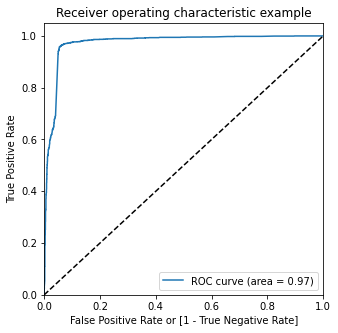

In [90]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [91]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.971910,1,1,1,1,1,1,1,1,1,1,1
1,0,0.003886,0,1,0,0,0,0,0,0,0,0,0
2,0,0.016105,0,1,0,0,0,0,0,0,0,0,0
3,1,0.948793,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011308,0,1,0,0,0,0,0,0,0,0,0


In [92]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.462683  1.000000  0.000000
0.1   0.1  0.932173  0.977112  0.893477
0.2   0.2  0.943520  0.971117  0.919756
0.3   0.3  0.945033  0.970572  0.923041
0.4   0.4  0.948563  0.966213  0.933365
0.5   0.5  0.950328  0.958038  0.943688
0.6   0.6  0.950580  0.955858  0.946035
0.7   0.7  0.946293  0.945504  0.946973
0.8   0.8  0.943016  0.935150  0.949789
0.9   0.9  0.827282  0.668665  0.963867


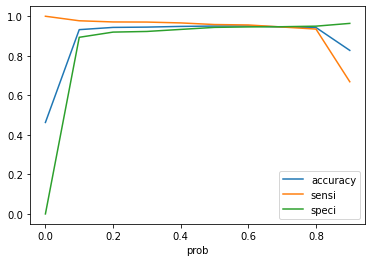

In [93]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.7, you get the optimal values of the three metrics. So let's choose 0.7 as our cutoff now.

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.7 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.971910,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.003886,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.016105,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.948793,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011308,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9462934947049925

In [96]:
# Let's create the confusion matrix once again



confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

In [97]:
confusion2

array([[2018,  113],
       [ 100, 1735]], dtype=int64)

In [98]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Calculate Sensitivity

TP/(TP+FN)

0.9455040871934605

In [100]:
# Calculate Specificity

TN/(TN+FP)

0.9469732519943689

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [101]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [102]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Tags_Already a student,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
1392,11.466667,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3123,66.466667,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8181,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3791,16.333333,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4318,11.866667,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [104]:
# Check X_test_sm

X_test_sm

,const,Total Time Spent on Website,Tags_Already a student,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
1392,1.0,11.466667,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3123,1.0,66.466667,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8181,1.0,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3791,1.0,16.333333,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4318,1.0,11.866667,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,1.0,72.466667,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,1.0,108.533333,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,1.0,3.133333,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3593,1.0,19.666667,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [105]:
# Drop the required columns from X_test as well

X_test.drop(['Tags_wrong number given', 'Tags_number not provided'], 1, 
                                inplace = True)

In [106]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res3.predict(sm.add_constant(X_test))

In [107]:
y_test_pred[:10]

1392    1.000000
3123    1.000000
8181    0.016105
3791    1.000000
4318    1.000000
6302    1.000000
5010    1.000000
344     0.016105
6483    0.003202
7820    1.000000
dtype: float64

In [108]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [109]:
# Let's see the head

y_pred_1.head()

,0
1392,1.000000
3123,1.000000
8181,0.016105
3791,1.000000
4318,1.000000


In [110]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [111]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [112]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [113]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,1.000000
1,1,1.000000
2,0,0.016105
3,0,1.000000
4,1,1.000000


In [114]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [115]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,1.000000
1,1,1.000000
2,0,0.016105
3,0,1.000000
4,1,1.000000


In [117]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.7 else 0)

In [118]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,1.000000,1
1,1,1.000000,1
2,0,0.016105,0
3,0,1.000000,1
4,1,1.000000,1


In [119]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5294117647058824

In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[172, 797],
       [  3, 728]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Calculate sensitivity
TP / float(TP+FN)

0.9958960328317373

In [123]:
# Calculate specificity
TN / float(TN+FP)

0.17750257997936017

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [124]:
#Looking at the confusion matrix again

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2011,  120],
       [  77, 1758]], dtype=int64)

##### Precision
TP / TP + FP

In [126]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9361022364217252

##### Recall
TP / TP + FN

In [127]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9580381471389646

### Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 3961    1
 3962    0
 3963    1
 3964    0
 3965    0
 Name: Converted, Length: 3966, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 3961    1
 3962    0
 3963    1
 3964    0
 3965    0
 Name: Predicted, Length: 3966, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

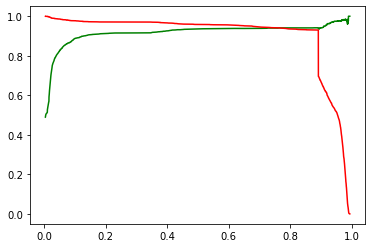

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.7 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.971910,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.003886,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.016105,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.948793,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011308,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9462934947049925

In [134]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2018,  113],
       [ 100, 1735]], dtype=int64)

In [135]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Calculate Precision

TP/(TP+FP)

0.9388528138528138

In [137]:
# Calculate Recall

TP/(TP+FN)

0.9455040871934605

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [138]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res3.predict(sm.add_constant(X_test))

In [139]:
y_test_pred[:10]

1392    1.000000
3123    1.000000
8181    0.016105
3791    1.000000
4318    1.000000
6302    1.000000
5010    1.000000
344     0.016105
6483    0.003202
7820    1.000000
dtype: float64

In [140]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
# Let's see the head

y_pred_1.head()

,0
1392,1.000000
3123,1.000000
8181,0.016105
3791,1.000000
4318,1.000000


In [142]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [143]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [145]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,1.000000
1,1,1.000000
2,0,0.016105
3,0,1.000000
4,1,1.000000


In [146]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [147]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,1.000000
1,1,1.000000
2,0,0.016105
3,0,1.000000
4,1,1.000000


In [148]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.7 else 0)

In [149]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,1.000000,1
1,1,1.000000,1
2,0,0.016105,0
3,0,1.000000,1
4,1,1.000000,1


In [150]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5294117647058824

In [151]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[172, 797],
       [  3, 728]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Calculate Precision

TP/(TP+FP)

0.47737704918032786

In [154]:
# Calculate Recall

TP/(TP+FN)

0.9958960328317373